In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
file ="mnist_784_csv.csv"

In [18]:
data = pd.read_csv(file)

In [19]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [20]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [21]:
x = np.reshape(x, (len(x), 28, 28, 1))

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [24]:
def add_noise(images):
    noise_factor = 0.5
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images


x_train_noisy = add_noise(x_train)
x_test_noisy  = add_noise(x_test)

In [25]:
# autoencoder model

In [26]:
autoencoder = keras.models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3,3 ), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

In [27]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Fit the model using noisy images as input
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=50, 
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.3837 - val_loss: 0.1602
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1521 - val_loss: 0.1355
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1336 - val_loss: 0.1275
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1265 - val_loss: 0.1230
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1227 - val_loss: 0.1203
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1200 - val_loss: 0.1179
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1177 - val_loss: 0.1163
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1162 - val_loss: 0.1150
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1150 - val_loss: 0.1139
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1142 - val_loss: 0.1130
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1132 - val_loss: 0.1122
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 

In [28]:
loss = autoencoder.evaluate(x_test_noisy, x_test)
print(loss)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1052
0.10487673431634903


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


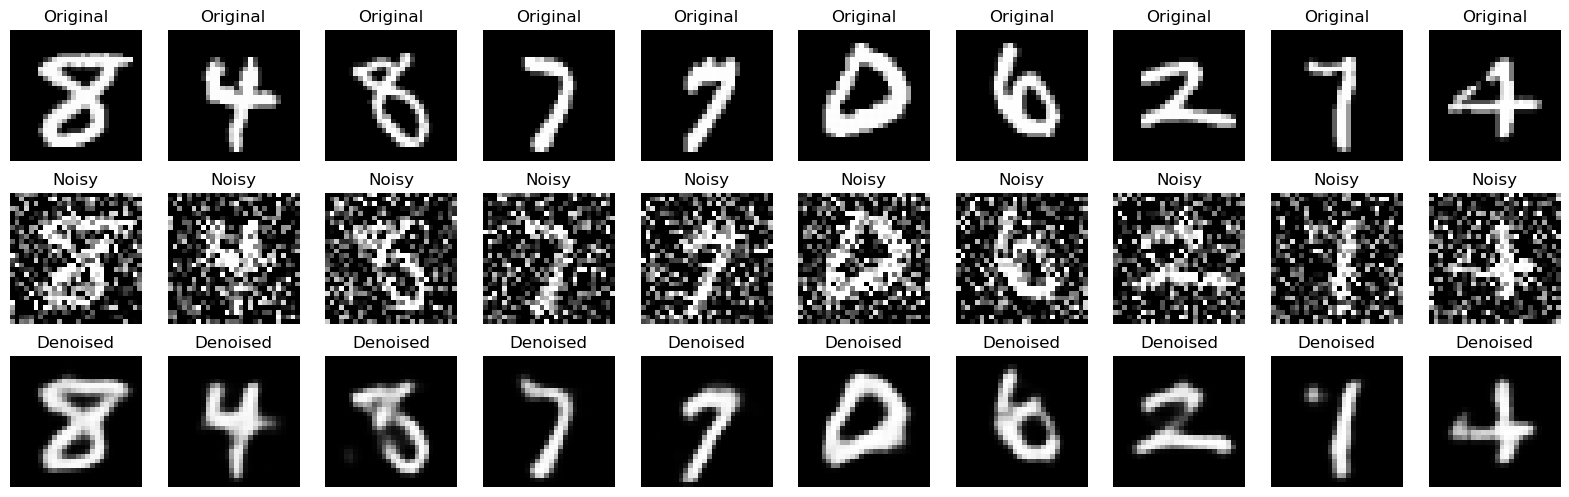

In [29]:
denoised_images = autoencoder.predict(x_test_noisy)

def display(original, noisy, denoised, n=10):
    plt.figure(figsize=(20, 6))
    
    for i in range(n):
        ax = plt.subplot(3, n, i+1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(3, n, i+1+n)
        plt.imshow(noisy[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy")
        plt.axis("off")

        ax = plt.subplot(3, n, i+1+2*n)
        plt.imshow(denoised[i].reshape(28, 28), cmap='gray')
        plt.title("Denoised")
        plt.axis("off")
        
    plt.show()


display(x_test, x_test_noisy, denoised_images)